In [ ]:
!jt -t oceans16 -tf merriserif -tfs 14 -f ptsans -fs 14

In [1]:
import anndata
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
from torch import nn
import torch
from sklearn.preprocessing import normalize

In [2]:
path = 'D:/Data/stereo-seq/olfactory_bulb/sim_n/'

In [3]:
save_path = 'D:\\plot_spatial\\simulation_n\\'

In [4]:
true_label_df.values.shape

NameError: name 'true_label_df' is not defined

In [5]:
true_label_df = pd.read_csv('D:/Data/stereo-seq/olfactory_bulb/sim_n/sim_st_label_2.csv', delimiter = ',', header = 0, index_col = 0)
true_label_df_5 = pd.read_csv('D:/Data/stereo-seq/olfactory_bulb/sim_n/sim_st_label_2_5.csv', delimiter = ',', header = 0, index_col = 0)
true_label_df_10 = pd.read_csv('D:/Data/stereo-seq/olfactory_bulb/sim_n/sim_st_label_2_10.csv', delimiter = ',', header = 0, index_col = 0)


In [6]:
true_label_df_3 = pd.read_csv('D:/Data/stereo-seq/olfactory_bulb/sim_n/sim_st_label_3.csv', delimiter = ',', header = 0, index_col = 0)
true_label_df_3_5 = pd.read_csv('D:/Data/stereo-seq/olfactory_bulb/sim_n/sim_st_label_3_5.csv', delimiter = ',', header = 0, index_col = 0)
true_label_df_3_10 = pd.read_csv('D:/Data/stereo-seq/olfactory_bulb/sim_n/sim_st_label_3_10.csv', delimiter = ',', header = 0, index_col = 0)


In [7]:
true_label_dict = {'2':true_label_df,'2_5':true_label_df_5,'2_10':true_label_df_10,'3':true_label_df_3,'3_5':true_label_df_3_5,'3_10':true_label_df_3_10}

In [8]:
label_df = pd.read_csv('D:/Data/stereo-seq/olfactory_bulb/sim_n/scRNA_label_7481.csv', delimiter = ',', header = 0, index_col = 0)
ct_name_lst = list(label_df.columns)

In [9]:
filter_ct = list(label_df.columns)
filter_ct.sort()

In [10]:
rctd_ct_ls = filter_ct[:15]+filter_ct[22:]+filter_ct[15:22]

In [11]:
import pandas as pd
from torch import nn
import torch
from sklearn.preprocessing import normalize


def eval_rctd(sim_spot_name_file, sim_result_file, true_label_df):
    sim_spot_name = pd.read_csv(sim_spot_name_file, header=None)
    selected_spot_lst = []
    for spot in sim_spot_name.values:
        selected_spot_lst.append(spot[0])
    select_idx_lst = []
    for spot_name in selected_spot_lst:
        idx = int(spot_name.split('_')[1])
        select_idx_lst.append(idx)
    select_true_label = true_label_df.values[select_idx_lst, :]

    ls = []
    #selected_st_adata = st_adata[selected_spot_lst,:]
    sim_result = pd.read_csv(sim_result_file, header=None)
    sim_result_ls = []
    for i in range(sim_result.values.shape[1]):
        tmp_ls = []
        for ele in sim_result.values[0][i].split('|'):
            tmp_ls.append(float(ele))
        sim_result_ls.append(tmp_ls)
    rctd_result = []
    for spot_res in sim_result_ls:
        tmp_ls = []
        for ct in list(label_df.columns):
            ls.append(ct)
            idx = rctd_ct_ls.index(ct)
            tmp_ls.append(spot_res[idx])
        rctd_result.append(tmp_ls)
    rctd_result = np.array(rctd_result)
    rctd_result.shape
    rctd_result = normalize(rctd_result, axis=1, norm='l1')

    tmp_select_true_label = torch.tensor(select_true_label.astype(np.float32))
    tmp_rctd_result = torch.tensor(rctd_result.astype(np.float32))
    return nn.L1Loss()(tmp_select_true_label, tmp_rctd_result)

In [12]:
path = 'D:/Data/stereo-seq/olfactory_bulb/sim_n/'

ct_ls = ['2','2_5','2_10','3','3_5','3_10']
rctd_l1_loss_lst = []
for ct in ct_ls:
    sim_spot_name_file = path+'spot_name_sim_'+ct+'.csv'
    sim_result_file =  path+'rctd_result_sim_'+ct+'.csv'
    true_label_df_tmp = true_label_dict[ct]
    rctd_l1_loss_lst.append(float(eval_rctd(sim_spot_name_file, sim_result_file, true_label_df_tmp)))

In [13]:
rctd_l1_loss_lst

[0.014893329702317715,
 0.02038297988474369,
 0.02250760793685913,
 0.016340361908078194,
 0.022349394857883453,
 0.024677785113453865]

In [36]:
true_label_df

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
1,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
4,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
49998,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
st_adata_dest=anndata.read_h5ad(ct_label_file)
st_adata_dest.obs_names

Index(['spot_0', 'spot_1', 'spot_2', 'spot_3', 'spot_4', 'spot_5', 'spot_6',
       'spot_7', 'spot_8', 'spot_9',
       ...
       'spot_49990', 'spot_49991', 'spot_49992', 'spot_49993', 'spot_49994',
       'spot_49995', 'spot_49996', 'spot_49997', 'spot_49998', 'spot_49999'],
      dtype='object', length=49567)

In [32]:
st_adata_dest.obsm['proportions'].index

Index(['spot_0', 'spot_1', 'spot_2', 'spot_3', 'spot_4', 'spot_5', 'spot_6',
       'spot_7', 'spot_8', 'spot_9',
       ...
       'spot_49990', 'spot_49991', 'spot_49992', 'spot_49993', 'spot_49994',
       'spot_49995', 'spot_49996', 'spot_49997', 'spot_49998', 'spot_49999'],
      dtype='object', length=49567)

In [33]:
def eval_dest(ct_label_file,true_label_df):
    st_adata_dest=anndata.read_h5ad(ct_label_file)


    select_idx_lst = []
    for spot_name in list(st_adata_dest.obsm['proportions'].index):
        idx = int(spot_name.split('_')[1])
        select_idx_lst.append(idx)
    select_true_label = true_label_df.values[select_idx_lst, :]
    
    
    ct_label = st_adata_dest.obsm['proportions']
    ct_list_tmp = list(ct_label.columns)
    ct_list = []
    for tmp_ct in ct_list_tmp:
        if '/' in tmp_ct:
            ct_list.append(tmp_ct.split('/')[0]+'_'+tmp_ct.split('/')[1])
        else:
            ct_list.append(tmp_ct)
    dest_result = []
    for i in range(ct_label.values.shape[0]):
        spot_res = ct_label.values[i]
        tmp_ls = []
        for ct in ct_name_lst:
            idx = ct_list.index(ct)
            tmp_ls.append(spot_res[idx])
        dest_result.append(tmp_ls)
    dest_result = np.array(dest_result)
    tmp_true_label = torch.tensor(select_true_label.astype(np.float32))
    tmp_dest_result = torch.tensor(dest_result.astype(np.float32))
    return nn.L1Loss()(tmp_true_label, tmp_dest_result)

In [34]:
ct_ls = ['2','2_5','2_10','3','3_5','3_10']
dest_l1_loss_lst = []
for ct in ct_ls:
    ct_label_file = path+'destvi_prop'+ct+'.h5ad'
    true_label_df_tmp = true_label_dict[ct]
    dest_l1_loss_lst.append(float(eval_dest(ct_label_file, true_label_df_tmp)))

In [35]:
dest_l1_loss_lst

[0.025117628276348114,
 0.03280208632349968,
 0.03321314603090286,
 0.027391305193305016,
 0.032597869634628296,
 0.03512152284383774]

In [37]:
def eval_stere(ct_label_file,true_label_df):
    ct_label_df = pd.read_csv(ct_label_file, delimiter=',', header=0)
    ct_label = ct_label_df.drop("Unnamed: 0",axis=1)
    ct_list_tmp = list(ct_label.columns)
    ct_list = []
    for tmp_ct in ct_list_tmp:
        if '/' in tmp_ct:
            ct_list.append(tmp_ct.split('/')[0]+'_'+tmp_ct.split('/')[1])
        else:
            ct_list.append(tmp_ct)
    stere_result = []
    for i in range(ct_label.values.shape[0]):
        spot_res = ct_label.values[i]
        tmp_ls = []
        for ct in ct_name_lst:
            idx = ct_list.index(ct)
            tmp_ls.append(spot_res[idx])
        stere_result.append(tmp_ls)
    stere_result = np.array(stere_result)
    tmp_true_label = torch.tensor(true_label_df.values.astype(np.float32))
    tmp_stere_result = torch.tensor(stere_result.astype(np.float32))
    return nn.L1Loss()(tmp_true_label, tmp_stere_result)

In [38]:
ct_ls = ['2','2_5','2_10','3','3_5','3_10']
stere_l1_loss_lst = []
for ct in ct_ls:
    ct_label_file = path+'stere_result_'+ct+'.csv'
    true_label_df_tmp = true_label_dict[ct]
    stere_l1_loss_lst.append(float(eval_stere(ct_label_file, true_label_df_tmp)))

In [39]:
stere_l1_loss_lst

[0.015196066349744797,
 0.021297484636306763,
 0.025460541248321533,
 0.01637599617242813,
 0.023406846448779106,
 0.028269093483686447]

In [40]:
def eval_spot(ct_label_file,true_label_df):
    ct_label_df = pd.read_csv(ct_label_file, delimiter=',', header=0)
    tmp_ct_list = list(ct_label_df.columns)
    ct_list = []
    for ct in tmp_ct_list:
        ct = ct.replace(".", "-")
        ct_list.append(ct)

    tmp_ct_name_lst = []
    for ct in ct_name_lst:
        ct = ct.replace("_", "-")
        tmp_ct_name_lst.append(ct)
    spotlight_result = []
    for i in range(ct_label_df.values.shape[0]):
        spot_res = ct_label_df.values[i]
        tmp_ls = []
        for ct in tmp_ct_name_lst:
            idx = ct_list.index(ct)
            tmp_ls.append(spot_res[idx])
        spotlight_result.append(tmp_ls)
    spotlight_result = np.array(spotlight_result)
    select_ls = []
    for idx in range(spotlight_result.shape[0]):
        if sum(spotlight_result[idx]) != 0:
            select_ls.append(idx)
    tmp_true_label = torch.tensor(true_label_df.values[select_ls,:].astype(np.float32))
    tmp_spotlight_result = torch.tensor(spotlight_result[select_ls,:].astype(np.float32))
    return nn.L1Loss()(tmp_true_label, tmp_spotlight_result)

In [41]:
ct_ls = ['2','2_5','2_10','3','3_5','3_10']
spotlight_l1_loss_lst = []
for ct in ct_ls:
    ct_label_file = path+'results_spotlight_sim_st_'+ct+'.csv'
    true_label_df_tmp = true_label_dict[ct]
    spotlight_l1_loss_lst.append(float(eval_spot(ct_label_file, true_label_df_tmp)))

In [42]:
spotlight_l1_loss_lst

[0.028092414140701294,
 0.03302228823304176,
 0.03504403680562973,
 0.02648318000137806,
 0.0323941633105278,
 0.03503889963030815]

In [43]:
def eval_stVAE(ct_label_file,true_label_df):
    ct_label_df = pd.read_csv(ct_label_file, delimiter=',', header=0)
    ct_label = ct_label_df.drop("Unnamed: 0",axis=1)
    stVAE_result = ct_label.values
    tmp_true_label = torch.tensor(true_label_df.values.astype(np.float32))
    tmp_stVAE_result = torch.tensor(stVAE_result.astype(np.float32))
    return nn.L1Loss()(tmp_true_label, tmp_stVAE_result)

In [16]:
ct_label_df = pd.read_csv(ct_label_file, delimiter=',', header=0)
ct_label = ct_label_df.drop("Unnamed: 0",axis=1)


KeyError: "['Unnamed: 0'] not found in axis"

In [18]:
ct_label.values.shape

NameError: name 'ct_label' is not defined

In [44]:
ct_ls = ['2','2_5','2_10','3','3_5','3_10']
stVAE_l1_loss_lst = []
for ct in ct_ls:
    ct_label_file = path+'stVAE_880_'+ct+'.csv'
    true_label_df_tmp = true_label_dict[ct]
    stVAE_l1_loss_lst.append(float(eval_stVAE(ct_label_file, true_label_df_tmp)))

In [45]:
stVAE_l1_loss_lst

[0.007448673248291016,
 0.013589722104370594,
 0.018257828429341316,
 0.009293997660279274,
 0.017771165817975998,
 0.023723339661955833]

In [69]:
l1_loss_dict = {'stVAE':stVAE_l1_loss_lst[:3],'DestVI':dest_l1_loss_lst[:3], 'RCTD':rctd_l1_loss_lst[:3],'Stereoscope':stere_l1_loss_lst[:3],'Spotlight':spotlight_l1_loss_lst[:3]}

In [72]:
l1_loss_dict = {'stVAE':stVAE_l1_loss_lst[3:],'DestVI':dest_l1_loss_lst[3:],'RCTD':rctd_l1_loss_lst[3:],'Stereoscope':stere_l1_loss_lst[3:],'Spotlight':spotlight_l1_loss_lst[3:]}

In [48]:
save_path

'D:\\plot_spatial\\simulation_n\\'

5914

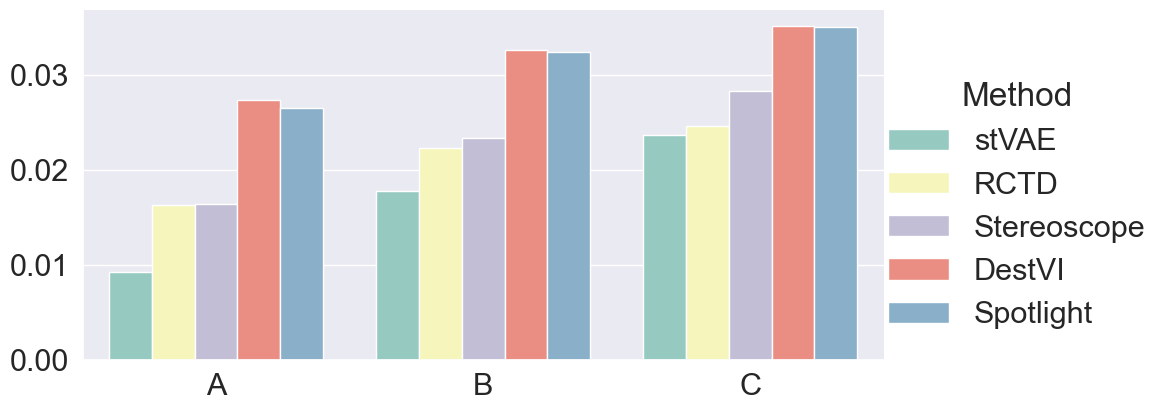

In [73]:
import gc
from matplotlib import pyplot as plt
method_ls = ['stVAE', 'RCTD', 'Stereoscope','DestVI','Spotlight']
setting_ls = ['A','B','C']
tmp_method_lst = []
tmp_setting_lst = []
tmp_loss_ls = []
for i in range(len(method_ls)):
    for j in range(len(setting_ls)):
        tmp_setting_lst.append(setting_ls[j])
        tmp_method_lst.append(method_ls[i])
        tmp_loss_ls.append(l1_loss_dict[method_ls[i]][j])
corr_dict = {'Method':tmp_method_lst, 'Setting': tmp_setting_lst, 'L1 Loss': np.array(tmp_loss_ls)}
corr_df = pd.DataFrame.from_dict(corr_dict)

import seaborn as sns
sns.set(font_scale=2)
fig = sns.catplot(x="Setting", y="L1 Loss", hue="Method", kind="bar", data=corr_df,palette="Set3",aspect=2)
#fig._legend.remove()
#plt.legend(bbox_to_anchor=(.45, -.4), ncol=2,loc="lower center", title=None, frameon=False,borderaxespad=0)
fig.set(xlabel=None)
fig.set(ylabel=None)
#g[2].figure.savefig(save_path+"N16_Nxph4.svg", format="svg", bbox_inches="tight",dpi=500)
fig.fig.savefig(save_path+"loss_comp_3_new.png", bbox_inches="tight")
#fig.fig.savefig(save_path+"loss_comp.png", bbox_inches="tight")

gc.collect()

In [64]:
def eval_prop(ct_ls):
    scale = ''
    stVAE_ls = []
    dest_ls = []
    
    rctd_ls = []
    stere_ls = []
    spotlight_ls = []
    rctd_select_ls = []
    dest_select_ls = []
    for ct_scale in ct_ls:
        ct_label_file = path+'stVAE_880_'+ct_scale+'.csv'


        ct_label_df = pd.read_csv(ct_label_file, delimiter=',', header=0)
        stVAE_ct_label = ct_label_df.drop("Unnamed: 0",axis=1)
        stVAE_ls.append(stVAE_ct_label.values)



        sim_spot_name_file = path+'spot_name_sim_'+ct_scale+'.csv'
        sim_result_file =  path+'rctd_result_sim_'+ct_scale+'.csv'
        sim_spot_name = pd.read_csv(sim_spot_name_file,header=None)
        selected_spot_lst = []
        for spot in sim_spot_name.values:
            selected_spot_lst.append(int(spot[0].split('_')[1]))
        rctd_select_ls.append(selected_spot_lst)

            
        ls = []
        sim_result = pd.read_csv(sim_result_file,header=None)
        sim_result_ls = []
        for i in range(sim_result.values.shape[1]):
            tmp_ls = []
            for ele in sim_result.values[0][i].split('|'):
                tmp_ls.append(float(ele))
            sim_result_ls.append(tmp_ls)
        rctd_result = []
        for spot_res in sim_result_ls:
            tmp_ls = []
            for ct in list(label_df.columns):
                ls.append(ct)
                idx = rctd_ct_ls.index(ct)
                tmp_ls.append(spot_res[idx])
            rctd_result.append(tmp_ls)
        rctd_result = np.array(rctd_result)
        rctd_result.shape
        rctd_result = normalize(rctd_result, axis=1, norm='l1')
        rctd_ls.append(rctd_result)


        ct_label_file = path+'stere_result_'+ct_scale+'.csv'
        ct_label_df = pd.read_csv(ct_label_file, delimiter=',', header=0)
        ct_label = ct_label_df.drop("Unnamed: 0",axis=1)
        ct_list_tmp = list(ct_label.columns)
        ct_list = []
        for tmp_ct in ct_list_tmp:
            if '/' in tmp_ct:
                ct_list.append(tmp_ct.split('/')[0]+'_'+tmp_ct.split('/')[1])
            else:
                ct_list.append(tmp_ct)
        stere_result = []
        for i in range(ct_label.values.shape[0]):
            spot_res = ct_label.values[i]
            tmp_ls = []
            for ct in ct_name_lst:
                idx = ct_list.index(ct)
                tmp_ls.append(spot_res[idx])
            stere_result.append(tmp_ls)
        stere_result = np.array(stere_result) 
        stere_ls.append(stere_result)


        ct_label_file = path+'destvi_prop'+ct_scale+'.h5ad'
        st_adata_dest=anndata.read_h5ad(ct_label_file)

        ct_label = st_adata_dest.obsm['proportions']
        ct_list_tmp = list(ct_label.columns)
        ct_list = []
        for tmp_ct in ct_list_tmp:
            if '/' in tmp_ct:
                ct_list.append(tmp_ct.split('/')[0]+'_'+tmp_ct.split('/')[1])
            else:
                ct_list.append(tmp_ct)
        dest_result = []
        for i in range(ct_label.values.shape[0]):
            spot_res = ct_label.values[i]
            tmp_ls = []
            for ct in ct_name_lst:
                idx = ct_list.index(ct)
                tmp_ls.append(spot_res[idx])
            dest_result.append(tmp_ls)
        dest_result = np.array(dest_result)
        dest_ls.append(dest_result)
        
        selected_spot_lst = []
        for spot in st_adata_dest.obs_names:
            selected_spot_lst.append(int(spot.split('_')[1]))
        dest_select_ls.append(selected_spot_lst)
        
        
        
        ct_label_file = path+'results_spotlight_sim_st_'+ct_scale+'.csv'
        ct_label_df = pd.read_csv(ct_label_file, delimiter=',', header=0)
        spotlight_pred_label = ct_label_df.values[:,:-1]
        spotlight_ls.append(spotlight_pred_label)
    return stVAE_ls, dest_ls,rctd_ls, stere_ls, spotlight_ls, rctd_select_ls, dest_select_ls

12887

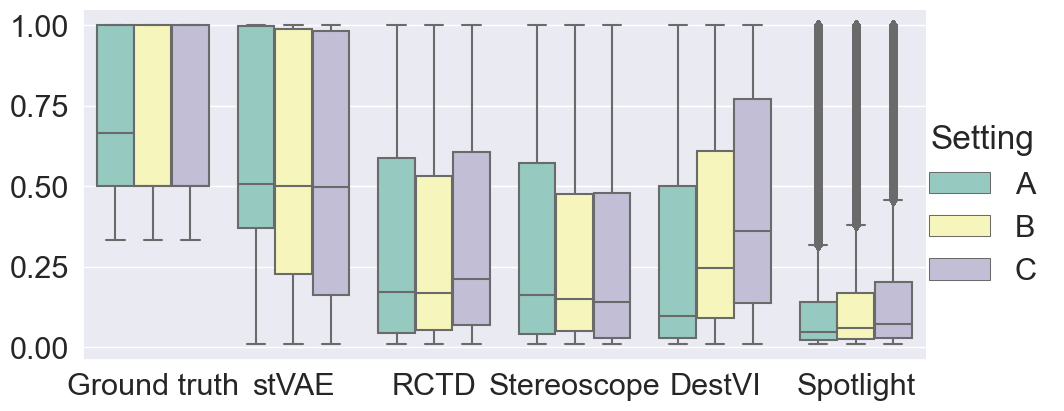

In [79]:
ct_ls = ['2','2_5','2_10']
method_ls_prop = ['Ground truth', 'stVAE','RCTD', 'Stereoscope', 'DestVI', 'Spotlight']
setting_ls = ['A','B','C']
stVAE_ls, dest_ls,rctd_ls, stere_ls, spotlight_ls, rctd_select_ls, dest_select_ls = eval_prop(ct_ls)
pred_result_2 = [[true_label_df.values,true_label_df_5.values, true_label_df_10.values],stVAE_ls,rctd_ls,stere_ls,dest_ls,spotlight_ls]
tmp_pred_ls = []
tmp_meth_ls = []
tmp_ct_ls = []
tmp_setting_lst = []
for idx in range(len(pred_result_2)):
    for jdx in range(len(setting_ls)):
        pred = pred_result_2[idx][jdx]
        spot_num = pred.shape[0]
        for ct in range(pred.shape[1]):
            for spot_idx in range(spot_num):
                if pred[spot_idx,ct] < 0.01:
                    continue
                tmp_setting_lst.append(setting_ls[jdx])
                tmp_pred_ls.append(pred[spot_idx,ct])
                tmp_meth_ls.append(method_ls_prop[idx])
ct_prop_dict = {'method':tmp_meth_ls, 'Proportion': tmp_pred_ls, 'Setting': tmp_setting_lst}
ct_prop_df = pd.DataFrame.from_dict(ct_prop_dict)

#fig = sns.catplot(x='method', y="Proportion", kind="box", data=ct_prop_df,palette="Set3",aspect=2)
fig = sns.catplot(x="method", y="Proportion", hue="Setting", kind="box", data=ct_prop_df,palette="Set3",aspect=2, showmeans=False)

#g[2].figure.savefig(save_path+"N16_Nxph4.svg", format="svg", bbox_inches="tight",dpi=500)
fig.set(xlabel=None)
fig.set(ylabel=None)

fig.fig.savefig(save_path+"All_pt_dist_setting_2_new.png",bbox_inches="tight")
import gc
gc.collect()

In [16]:
save_path

'D:\\plot_spatial\\simulation_n\\'

In [35]:
%%html
<style type='text/css'>
.CodeMirror{
font-family: normal;
font-size: 15px;
</style>

12846

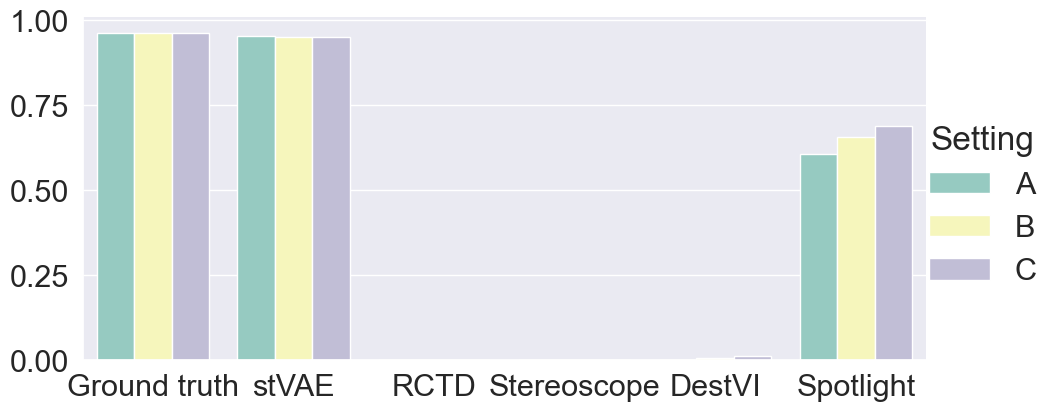

In [87]:
ct_ls = ['2','2_5','2_10']
method_ls_prop = ['Ground truth', 'stVAE', 'RCTD', 'Stereoscope','DestVI', 'Spotlight']
setting_ls = ['A','B','C']
stVAE_ls, dest_ls,rctd_ls, stere_ls, spotlight_ls, rctd_select_ls, dest_select_ls = eval_prop(ct_ls)
pred_result_2 = [[true_label_df.values,true_label_df_5.values, true_label_df_10.values],stVAE_ls,rctd_ls,stere_ls,dest_ls,spotlight_ls]
tmp_pred_ls = []
tmp_meth_ls = []
tmp_ct_ls = []
tmp_setting_lst = []
for idx in range(len(pred_result_2)):
    for jdx in range(len(setting_ls)):
        pred = pred_result_2[idx][jdx]
        spot_num = pred.shape[0]
        tmp = np.where(pred==0)
        num_zeros = tmp[0].size
        num_ele = pred.size
        tmp_setting_lst.append(setting_ls[jdx])
        tmp_pred_ls.append(num_zeros/num_ele)
        tmp_meth_ls.append(method_ls_prop[idx])
ct_prop_dict = {'method':tmp_meth_ls, 'Proportion': tmp_pred_ls, 'Setting': tmp_setting_lst}
ct_prop_df = pd.DataFrame.from_dict(ct_prop_dict)

#fig = sns.catplot(x='method', y="Proportion", kind="box", data=ct_prop_df,palette="Set3",aspect=2)
fig = sns.catplot(x="method", y="Proportion", hue="Setting", kind="bar", data=ct_prop_df,palette="Set3",aspect=2)

#g[2].figure.savefig(save_path+"N16_Nxph4.svg", format="svg", bbox_inches="tight",dpi=500)
fig.set(xlabel=None)
fig.set(ylabel=None)

fig.fig.savefig(save_path+"All_zero_pt_dist_setting_2_new.png",bbox_inches="tight")
import gc
gc.collect()

6085

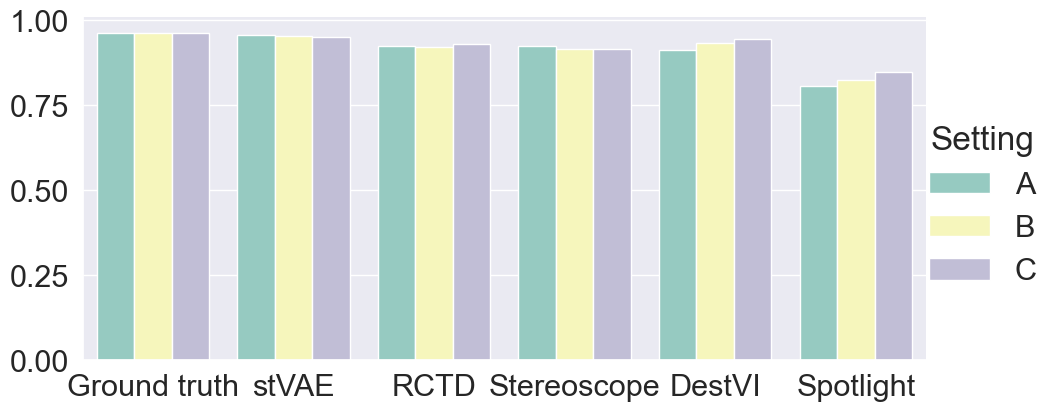

In [88]:
ct_ls = ['2','2_5','2_10']


method_ls_prop = ['Ground truth', 'stVAE', 'RCTD', 'Stereoscope','DestVI', 'Spotlight']
setting_ls = ['A','B','C']
stVAE_ls, dest_ls,rctd_ls, stere_ls, spotlight_ls, rctd_select_ls, dest_select_ls = eval_prop(ct_ls)
pred_result_2 = [[true_label_df.values,true_label_df_5.values, true_label_df_10.values],stVAE_ls,rctd_ls,stere_ls,dest_ls,spotlight_ls]

tmp_pred_ls = []
tmp_meth_ls = []
tmp_ct_ls = []
tmp_setting_lst = []
for idx in range(len(pred_result_2)):
    for jdx in range(len(setting_ls)):
        pred = pred_result_2[idx][jdx]
        spot_num = pred.shape[0]
        count = 0
        sum_count = 0
        for ct in range(pred.shape[1]):
            for spot_idx in range(spot_num):
                sum_count += 1
                if pred[spot_idx,ct] < 0.01:
                    count += 1
        tmp_setting_lst.append(setting_ls[jdx])
        tmp_pred_ls.append(count/sum_count)
        tmp_meth_ls.append(method_ls_prop[idx])
ct_prop_dict = {'method':tmp_meth_ls, 'Proportion': tmp_pred_ls, 'Setting': tmp_setting_lst}
tmp_ct_prop_df = pd.DataFrame.from_dict(ct_prop_dict)

#fig = sns.catplot(x='method', y="Proportion", kind="box", data=ct_prop_df,palette="Set3",aspect=2)
fig = sns.catplot(x="method", y="Proportion", hue="Setting", kind="bar", data=tmp_ct_prop_df,palette="Set3",aspect=2)

#g[2].figure.savefig(save_path+"N16_Nxph4.svg", format="svg", bbox_inches="tight",dpi=500)
fig.set(xlabel=None)
fig.set(ylabel=None)

fig.fig.savefig(save_path+"All_zero_pt_dist_setting_cutoff_2_new.png",bbox_inches="tight")
import gc
gc.collect()

5728

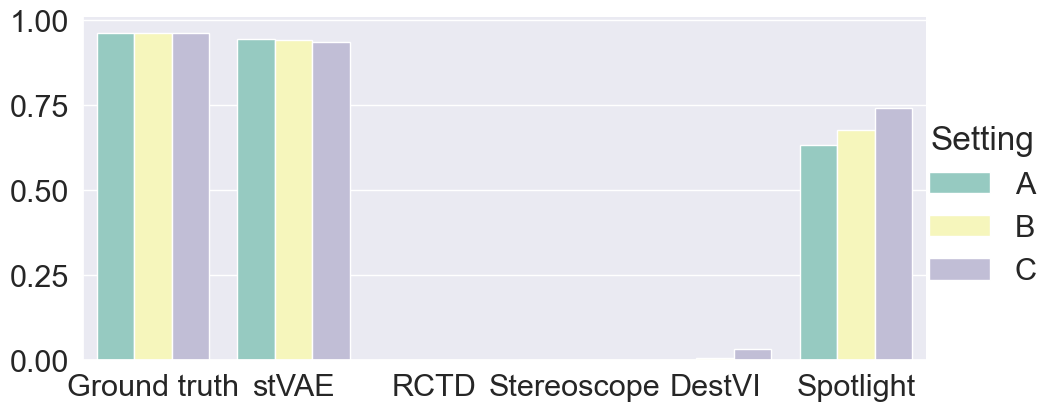

In [89]:
ct_ls = ['3','3_5','3_10']

method_ls_prop = ['Ground truth', 'stVAE', 'RCTD', 'Stereoscope','DestVI', 'Spotlight']
setting_ls = ['A','B','C']
stVAE_ls, dest_ls,rctd_ls, stere_ls, spotlight_ls, rctd_select_ls, dest_select_ls = eval_prop(ct_ls)
pred_result_2 = [[true_label_df.values,true_label_df_5.values, true_label_df_10.values],stVAE_ls,rctd_ls,stere_ls,dest_ls,spotlight_ls]


tmp_pred_ls = []
tmp_meth_ls = []
tmp_ct_ls = []
tmp_setting_lst = []
for idx in range(len(pred_result_2)):
    for jdx in range(len(setting_ls)):
        pred = pred_result_2[idx][jdx]
        spot_num = pred.shape[0]
        tmp = np.where(pred==0)
        num_zeros = tmp[0].size
        num_ele = pred.size
        tmp_setting_lst.append(setting_ls[jdx])
        tmp_pred_ls.append(num_zeros/num_ele)
        tmp_meth_ls.append(method_ls_prop[idx])
ct_prop_dict = {'method':tmp_meth_ls, 'Proportion': tmp_pred_ls, 'Setting': tmp_setting_lst}
ct_prop_df = pd.DataFrame.from_dict(ct_prop_dict)

#fig = sns.catplot(x='method', y="Proportion", kind="box", data=ct_prop_df,palette="Set3",aspect=2)
fig = sns.catplot(x="method", y="Proportion", hue="Setting", kind="bar", data=ct_prop_df,palette="Set3",aspect=2)

#g[2].figure.savefig(save_path+"N16_Nxph4.svg", format="svg", bbox_inches="tight",dpi=500)
fig.set(xlabel=None)
fig.set(ylabel=None)

fig.fig.savefig(save_path+"All_zero_pt_dist_setting_3_new.png",bbox_inches="tight")
import gc
gc.collect()

6090

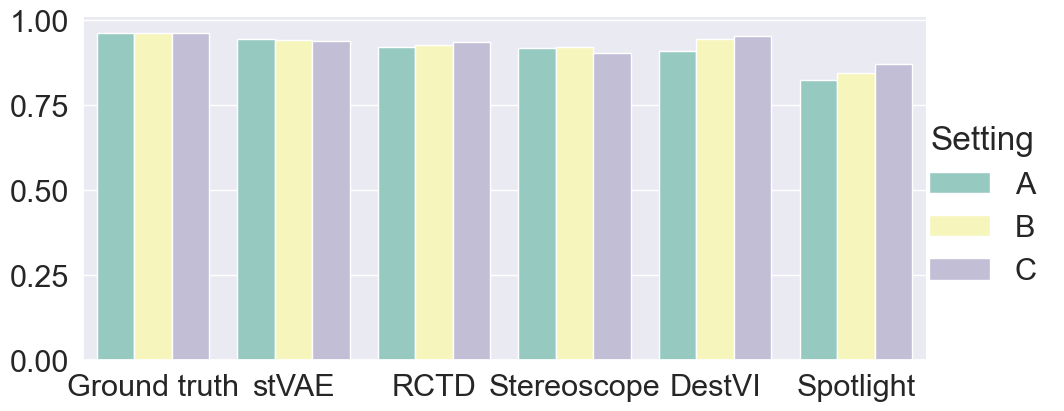

In [90]:
ct_ls = ['3','3_5','3_10']

method_ls_prop = ['Ground truth', 'stVAE', 'RCTD', 'Stereoscope','DestVI', 'Spotlight']
setting_ls = ['A','B','C']
stVAE_ls, dest_ls,rctd_ls, stere_ls, spotlight_ls, rctd_select_ls, dest_select_ls = eval_prop(ct_ls)
pred_result_2 = [[true_label_df.values,true_label_df_5.values, true_label_df_10.values],stVAE_ls,rctd_ls,stere_ls,dest_ls,spotlight_ls]

tmp_pred_ls = []
tmp_meth_ls = []
tmp_ct_ls = []
tmp_setting_lst = []
for idx in range(len(pred_result_2)):
    for jdx in range(len(setting_ls)):
        pred = pred_result_2[idx][jdx]
        spot_num = pred.shape[0]
        count = 0
        sum_count = 0
        for ct in range(pred.shape[1]):
            for spot_idx in range(spot_num):
                sum_count += 1
                if pred[spot_idx,ct] < 0.01:
                    count += 1
        tmp_setting_lst.append(setting_ls[jdx])
        tmp_pred_ls.append(count/sum_count)
        tmp_meth_ls.append(method_ls_prop[idx])
ct_prop_dict = {'method':tmp_meth_ls, 'Proportion': tmp_pred_ls, 'Setting': tmp_setting_lst}
tmp_ct_prop_df = pd.DataFrame.from_dict(ct_prop_dict)
sns.set(font_scale=2) 
#fig = sns.catplot(x='method', y="Proportion", kind="box", data=ct_prop_df,palette="Set3",aspect=2)
fig = sns.catplot(x="method", y="Proportion", hue="Setting", kind="bar", data=tmp_ct_prop_df,palette="Set3",aspect=2)

#g[2].figure.savefig(save_path+"N16_Nxph4.svg", format="svg", bbox_inches="tight",dpi=500)
fig.set(xlabel=None)
fig.set(ylabel=None)

fig.fig.savefig(save_path+"All_zero_pt_dist_setting_cutoff_3_new.png",bbox_inches="tight")
import gc
gc.collect()

13760

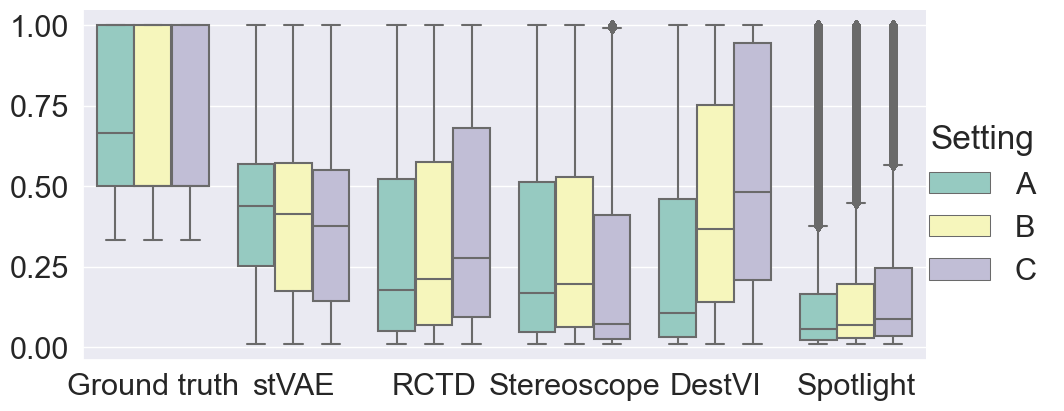

In [85]:
ct_ls = ['3','3_5','3_10']


method_ls_prop = ['Ground truth', 'stVAE', 'RCTD', 'Stereoscope','DestVI', 'Spotlight']
setting_ls = ['A','B','C']
stVAE_ls, dest_ls,rctd_ls, stere_ls, spotlight_ls, rctd_select_ls,  dest_select_ls= eval_prop(ct_ls)
pred_result_3 = [[true_label_df.values,true_label_df_5.values, true_label_df_10.values],stVAE_ls,rctd_ls,stere_ls,dest_ls,spotlight_ls]


tmp_pred_ls = []
tmp_meth_ls = []
tmp_ct_ls = []
tmp_setting_lst = []
for idx in range(len(pred_result_3)):
    for jdx in range(len(setting_ls)):
        pred = pred_result_3[idx][jdx]
        spot_num = pred.shape[0]
        for ct in range(pred.shape[1]):
            for spot_idx in range(spot_num):
                if pred[spot_idx,ct] < 0.01:
                    continue
                tmp_setting_lst.append(setting_ls[jdx])
                tmp_pred_ls.append(pred[spot_idx,ct])
                tmp_meth_ls.append(method_ls_prop[idx])
ct_prop_dict = {'method':tmp_meth_ls, 'Proportion': tmp_pred_ls, 'Setting': tmp_setting_lst}
ct_prop_df = pd.DataFrame.from_dict(ct_prop_dict)

#fig = sns.catplot(x='method', y="Proportion", kind="box", data=ct_prop_df,palette="Set3",aspect=2)
fig = sns.catplot(x="method", y="Proportion", hue="Setting", kind="box", data=ct_prop_df,palette="Set3",aspect=2, showmeans=False)

#g[2].figure.savefig(save_path+"N16_Nxph4.svg", format="svg", bbox_inches="tight",dpi=500)
fig.set(xlabel=None)
fig.set(ylabel=None)
fig.fig.savefig(save_path+"All_pt_dist_setting_3_new.png",bbox_inches="tight")
import gc
gc.collect()

In [60]:
stRNA = anndata.read_h5ad('D:\\Data\\stereo-seq\\olfactory_bulb\\sim_n\\sim_st_2.h5ad')

In [61]:
marker_dict_n = {}
marker_df = pd.read_excel('C:\\Users\\tutoradmin\\Downloads\\ob_marker.xlsx', sheet_name=None)
for index, row in marker_df['1-s2.0-S2211124718317972-mmc2'].iterrows():
    ct = row['cluster'].split('.')[1]
    marker = row['gene']
    if 'Neuron' in ct:
        continue
    if ct == 'Mf':
        ct = 'Mφ'
    if marker not in stRNA.var_names:
        continue
    if ct not in marker_dict_n:
        marker_dict_n.update({ct : [marker]})
    else:
        if len(marker_dict_n[ct]) == 2:
            continue
        marker_dict_n[ct].append(marker)
marker_df_n = pd.read_excel('C:\\Users\\tutoradmin\\Downloads\\olfactory_marker_n.xlsx', sheet_name=None)
for index, row in marker_df_n['1-s2.0-S2211124718317972-mmc3'].iterrows():
    ct = row['cluster']
    marker = row['gene']
    for tmp_ct in ct_name_lst:
        if ct in tmp_ct:
            ct = tmp_ct
    if marker not in stRNA.var_names:
        continue
    if ct not in marker_dict_n:
        marker_dict_n.update({ct : [marker]})
    else:
        if len(marker_dict_n[ct]) == 2:
            continue
        marker_dict_n[ct].append(marker)

14974

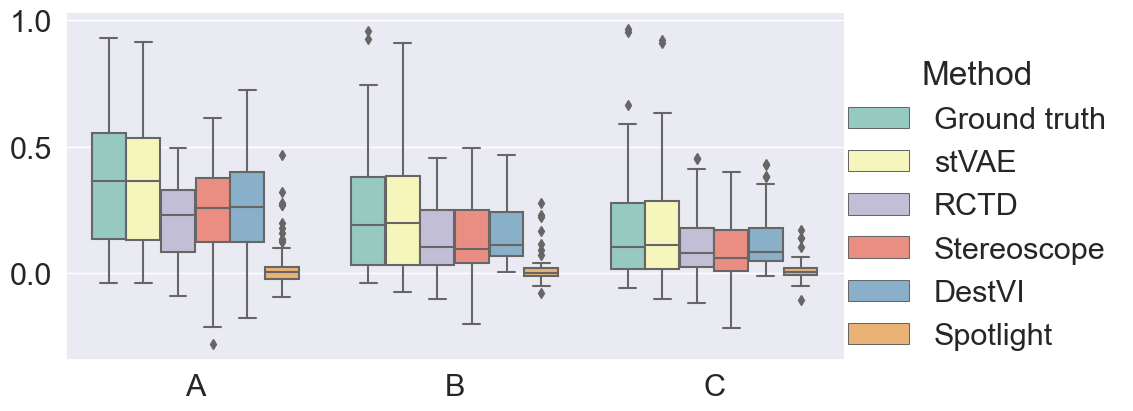

In [77]:
import anndata
ct_ls = ['3','3_5','3_10']

method_ls_prop = ['Ground truth', 'stVAE', 'RCTD', 'Stereoscope','DestVI', 'Spotlight']
setting_ls = ['A','B','C']
stVAE_ls, dest_ls,rctd_ls, stere_ls, spotlight_ls, rctd_select_ls, dest_select_ls = eval_prop(ct_ls)

#result_ls = [stVAE_ct_label, rctd_pred_label, stereo_pred_label, spotlight_pred_label]
pred_result = [[true_label_df_3.values, true_label_df_3_5.values, true_label_df_3_10.values],stVAE_ls,rctd_ls,stere_ls,dest_ls,spotlight_ls]

st_path = 'D:/Data/stereo-seq/olfactory_bulb/sim_n/'
st_adata_ls = [st_path+'sim_st_3.h5ad',st_path+'sim_st_3_5.h5ad',st_path+'sim_st_3_10.h5ad']

tmp_meth_ls = []
tmp_corr_ls = []
tmp_setting_ls = []
for jdx in range(len(st_adata_ls)):
    result_ls = []
    for ele in pred_result:
        result_ls.append(ele[jdx])
    st_adata=anndata.read_h5ad(st_adata_ls[jdx])
    gene_ls = []
    method_corr_dict = {'Ground truth':[],'stVAE':[],'RCTD':[],'Stereoscope':[],'DestVI':[],'Spotlight':[]}
    for ct in marker_dict_n:
        corr_ls = []
        for gene in marker_dict_n[ct]:
            if gene not in st_adata.var_names:
                continue
            y = st_adata[:,gene].X.A.T[0]
            for idx in range(len(result_ls)): 
                x = result_ls[idx][:,ct_name_lst.index(ct)]
                ls = []
                for ele in x:
                    if ele < 0.0:
                        ls.append(0)
                    else:
                        ls.append(ele)
                if idx == 2:
                    corr = scipy.stats.spearmanr(ls, y[rctd_select_ls[jdx]])[0]
                if idx == 4:
                    corr = scipy.stats.spearmanr(ls, y[dest_select_ls[jdx]])[0]
                if idx != 2 and idx != 4:
                    corr = scipy.stats.spearmanr(ls, y)[0]
                if idx == 0:
                    method_corr_dict['Ground truth'].append(corr)
                if idx == 1:
                    method_corr_dict['stVAE'].append(corr)
                if idx == 4:
                    method_corr_dict['DestVI'].append(corr)
                if idx == 2:
                    method_corr_dict['RCTD'].append(corr)
                if idx == 3:
                    method_corr_dict['Stereoscope'].append(corr)
                if idx == 5:
                    method_corr_dict['Spotlight'].append(corr)
            gene_ls.append(gene)
    for mt in method_corr_dict:
        for cor in method_corr_dict[mt]:
            tmp_meth_ls.append(mt)
            tmp_corr_ls.append(cor)
            tmp_setting_ls.append(setting_ls[jdx])
    #corr_dict = {'method':tmp_meth_ls, 'Correlation': np.array(tmp_corr_ls)}
    #corr_df = pd.DataFrame.from_dict(corr_dict)

    '''import seaborn as sns
    sns.set(font_scale=1)
    fig = sns.catplot(x="method", y="Correlation", kind="box", data=corr_df,palette="Set2", showmeans=True)
    fig.set(xlabel=None)
    fig.set(ylabel=None)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['bottom'].set_color('black')

    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['left'].set_color('black')
    fig.savefig(save_path+"corr.pdf",bbox_inches="tight",transparent=True)'''

sns.set(font_scale=2) 
ct_prop_dict = {'Method':tmp_meth_ls, 'Correlation': tmp_corr_ls, 'Setting': tmp_setting_ls}
ct_prop_df = pd.DataFrame.from_dict(ct_prop_dict)
#fig = sns.catplot(x='method', y="Proportion", kind="box", data=ct_prop_df,palette="Set3",aspect=2)
fig = sns.catplot(x="Setting", y="Correlation", hue="Method", kind="box", data=ct_prop_df,palette="Set3",aspect=2, showmeans=False)

#g[2].figure.savefig(save_path+"N16_Nxph4.svg", format="svg", bbox_inches="tight",dpi=500)
fig.set(xlabel=None)
fig.set(ylabel=None)

fig.fig.savefig(save_path+"ct_marker_corr_3_new.pdf",bbox_inches="tight")
import gc
gc.collect()

C:\Users\tutoradmin\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\tutoradmin\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\tutoradmin\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


5636

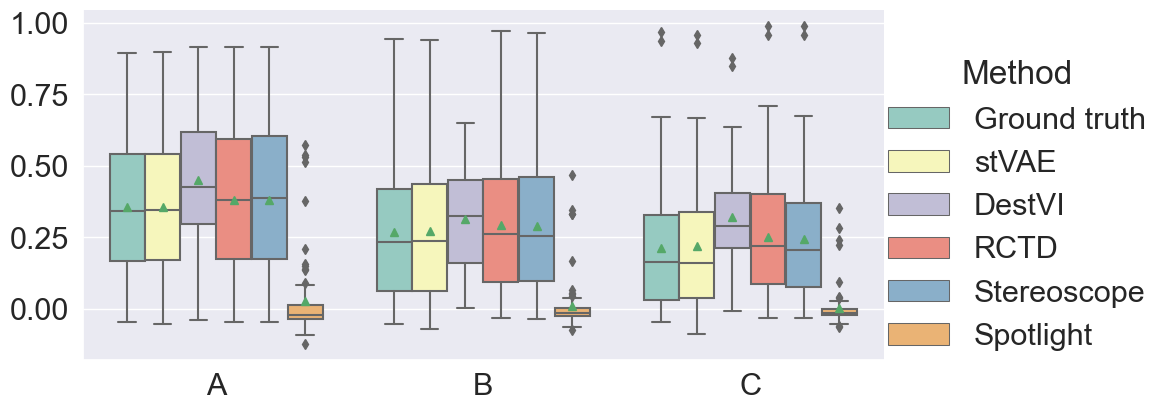

In [65]:
import anndata
ct_ls = ['2','2_5','2_10']


method_ls_prop = ['Ground truth', 'stVAE','DestVI', 'RCTD', 'Stereoscope', 'Spotlight']
setting_ls = ['A','B','C']
stVAE_ls, dest_ls,rctd_ls, stere_ls, spotlight_ls, rctd_select_ls, dest_select_ls = eval_prop(ct_ls)

#result_ls = [stVAE_ct_label, rctd_pred_label, stereo_pred_label, spotlight_pred_label]
pred_result = [[true_label_df.values, true_label_df_5.values, true_label_df_10.values],stVAE_ls,rctd_ls,stere_ls,dest_ls,spotlight_ls]

st_path = 'D:/Data/stereo-seq/olfactory_bulb/sim_n/'
st_adata_ls = [st_path+'sim_st_2.h5ad',st_path+'sim_st_2_5.h5ad',st_path+'sim_st_2_10.h5ad']

tmp_meth_ls = []
tmp_corr_ls = []
tmp_setting_ls = []
for jdx in range(len(st_adata_ls)):
    result_ls = []
    for ele in pred_result:
        result_ls.append(ele[jdx])
    st_adata=anndata.read_h5ad(st_adata_ls[jdx])
    gene_ls = []
    method_corr_dict = {'Ground truth':[],'stVAE':[],'RCTD':[],'Stereoscope':[],'DestVI':[],'Spotlight':[]}
    for ct in marker_dict_n:
        corr_ls = []
        for gene in marker_dict_n[ct]:
            if gene not in st_adata.var_names:
                continue
            y = st_adata[:,gene].X.A.T[0]
            for idx in range(len(result_ls)): 
                x = result_ls[idx][:,ct_name_lst.index(ct)]
                ls = []
                for ele in x:
                    if ele < 0.0:
                        ls.append(0)
                    else:
                        ls.append(ele)
                if idx == 3:
                    corr = scipy.stats.spearmanr(ls, y[rctd_select_ls[jdx]])[0]
                if idx == 2:
                    corr = scipy.stats.spearmanr(ls, y[dest_select_ls[jdx]])[0]
                if idx != 2 and idx != 3:
                    corr = scipy.stats.spearmanr(ls, y)[0]
                if idx == 0:
                    method_corr_dict['Ground truth'].append(corr)
                if idx == 1:
                    method_corr_dict['stVAE'].append(corr)
                if idx == 2:
                    method_corr_dict['DestVI'].append(corr)
                if idx == 3:
                    method_corr_dict['RCTD'].append(corr)
                if idx == 4:
                    method_corr_dict['Stereoscope'].append(corr)
                if idx == 5:
                    method_corr_dict['Spotlight'].append(corr)
            gene_ls.append(gene)
    for mt in method_corr_dict:
        for cor in method_corr_dict[mt]:
            tmp_meth_ls.append(mt)
            tmp_corr_ls.append(cor)
            tmp_setting_ls.append(setting_ls[jdx])
    #corr_dict = {'method':tmp_meth_ls, 'Correlation': np.array(tmp_corr_ls)}
    #corr_df = pd.DataFrame.from_dict(corr_dict)

    '''import seaborn as sns
    sns.set(font_scale=1)
    fig = sns.catplot(x="method", y="Correlation", kind="box", data=corr_df,palette="Set2", showmeans=True)
    fig.set(xlabel=None)
    fig.set(ylabel=None)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['bottom'].set_color('black')

    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['left'].set_color('black')
    fig.savefig(save_path+"corr.pdf",bbox_inches="tight",transparent=True)'''

sns.set(font_scale=2) 
ct_prop_dict = {'Method':tmp_meth_ls, 'Correlation': tmp_corr_ls, 'Setting': tmp_setting_ls}
ct_prop_df = pd.DataFrame.from_dict(ct_prop_dict)
#fig = sns.catplot(x='method', y="Proportion", kind="box", data=ct_prop_df,palette="Set3",aspect=2)
fig = sns.catplot(x="Setting", y="Correlation", hue="Method", kind="box", data=ct_prop_df,palette="Set3",aspect=2, showmeans=True)

#g[2].figure.savefig(save_path+"N16_Nxph4.svg", format="svg", bbox_inches="tight",dpi=500)
fig.set(xlabel=None)
fig.set(ylabel=None)

fig.fig.savefig(save_path+"ct_marker_corr_2_new.pdf",bbox_inches="tight")
import gc
gc.collect()

13767

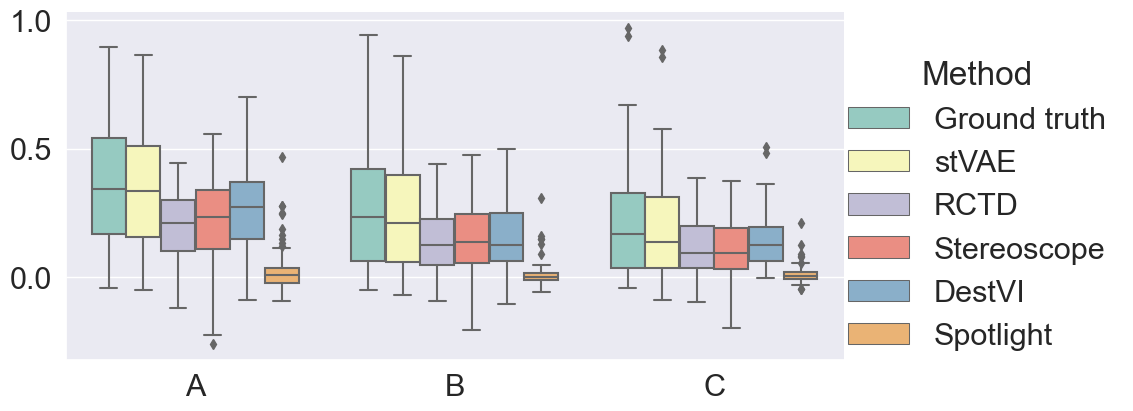

In [78]:
import anndata
ct_ls = ['2','2_5','2_10']


method_ls_prop = ['Ground truth', 'stVAE', 'RCTD', 'Stereoscope','DestVI','Spotlight']
setting_ls = ['A','B','C']
stVAE_ls, dest_ls,rctd_ls, stere_ls, spotlight_ls, rctd_select_ls, dest_select_ls = eval_prop(ct_ls)

#result_ls = [stVAE_ct_label, rctd_pred_label, stereo_pred_label, spotlight_pred_label]
pred_result = [[true_label_df.values, true_label_df_5.values, true_label_df_10.values],stVAE_ls,rctd_ls,stere_ls,dest_ls,spotlight_ls]

st_path = 'D:/Data/stereo-seq/olfactory_bulb/sim_n/'
st_adata_ls = [st_path+'sim_st_2.h5ad',st_path+'sim_st_2_5.h5ad',st_path+'sim_st_2_10.h5ad']

tmp_meth_ls = []
tmp_corr_ls = []
tmp_setting_ls = []
for jdx in range(len(st_adata_ls)):
    result_ls = []
    for ele in pred_result:
        result_ls.append(ele[jdx])
    st_adata=anndata.read_h5ad(st_adata_ls[jdx])
    gene_ls = []
    method_corr_dict = {'Ground truth':[],'stVAE':[],'RCTD':[],'Stereoscope':[],'DestVI':[],'Spotlight':[]}
    for ct in marker_dict_n:
        corr_ls = []
        for gene in marker_dict_n[ct]:
            if gene not in st_adata.var_names:
                continue
            y = st_adata[:,gene].X.A.T[0]
            for idx in range(len(result_ls)): 
                x = result_ls[idx][:,ct_name_lst.index(ct)]
                ls = []
                for ele in x:
                    if ele < 0.1:
                        ls.append(0)
                    else:
                        ls.append(ele)
                if idx == 2:
                    corr = scipy.stats.spearmanr(ls, y[rctd_select_ls[jdx]])[0]
                if idx == 4:
                    corr = scipy.stats.spearmanr(ls, y[dest_select_ls[jdx]])[0]
                if idx != 2 and idx != 4:
                    corr = scipy.stats.spearmanr(ls, y)[0]
                if idx == 0:
                    method_corr_dict['Ground truth'].append(corr)
                if idx == 1:
                    method_corr_dict['stVAE'].append(corr)
                if idx == 4:
                    method_corr_dict['DestVI'].append(corr)
                if idx == 2:
                    method_corr_dict['RCTD'].append(corr)
                if idx == 3:
                    method_corr_dict['Stereoscope'].append(corr)
                if idx == 5:
                    method_corr_dict['Spotlight'].append(corr)
            gene_ls.append(gene)
    for mt in method_corr_dict:
        for cor in method_corr_dict[mt]:
            tmp_meth_ls.append(mt)
            tmp_corr_ls.append(cor)
            tmp_setting_ls.append(setting_ls[jdx])
    #corr_dict = {'method':tmp_meth_ls, 'Correlation': np.array(tmp_corr_ls)}
    #corr_df = pd.DataFrame.from_dict(corr_dict)

    '''import seaborn as sns
    sns.set(font_scale=1)
    fig = sns.catplot(x="method", y="Correlation", kind="box", data=corr_df,palette="Set2", showmeans=True)
    fig.set(xlabel=None)
    fig.set(ylabel=None)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['bottom'].set_color('black')

    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['left'].set_color('black')
    fig.savefig(save_path+"corr.pdf",bbox_inches="tight",transparent=True)'''

sns.set(font_scale=2) 
ct_prop_dict = {'Method':tmp_meth_ls, 'Correlation': tmp_corr_ls, 'Setting': tmp_setting_ls}
ct_prop_df = pd.DataFrame.from_dict(ct_prop_dict)
#fig = sns.catplot(x='method', y="Proportion", kind="box", data=ct_prop_df,palette="Set3",aspect=2)
fig = sns.catplot(x="Setting", y="Correlation", hue="Method", kind="box", data=ct_prop_df,palette="Set3",aspect=2, showmeans=False)

#g[2].figure.savefig(save_path+"N16_Nxph4.svg", format="svg", bbox_inches="tight",dpi=500)
fig.set(xlabel=None)
fig.set(ylabel=None)

#fig.fig.savefig(save_path+"ct_marker_corr_2_new.pdf",bbox_inches="tight")
import gc
gc.collect()

C:\Users\tutoradmin\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\tutoradmin\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\tutoradmin\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


6550

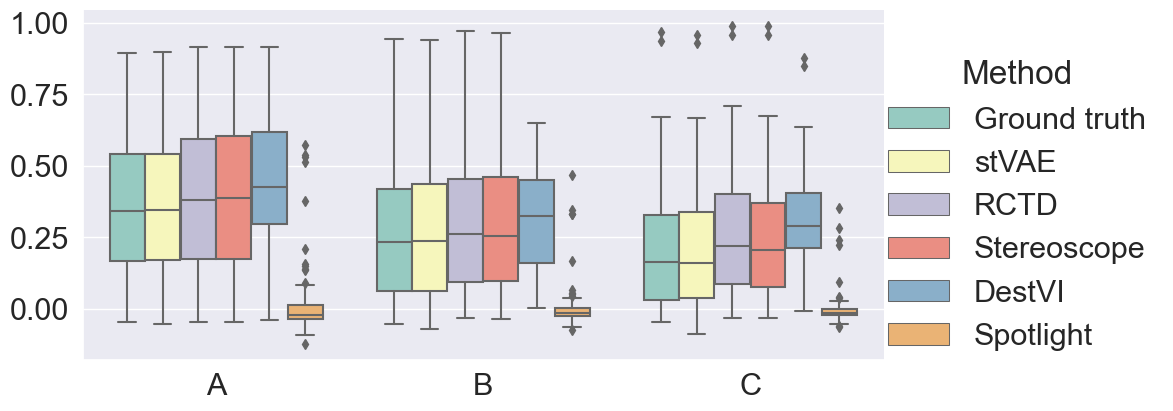

In [91]:
import anndata
ct_ls = ['2','2_5','2_10']


method_ls_prop = ['Ground truth', 'stVAE', 'RCTD', 'Stereoscope','DestVI','Spotlight']
setting_ls = ['A','B','C']
stVAE_ls, dest_ls,rctd_ls, stere_ls, spotlight_ls, rctd_select_ls, dest_select_ls = eval_prop(ct_ls)

#result_ls = [stVAE_ct_label, rctd_pred_label, stereo_pred_label, spotlight_pred_label]
pred_result = [[true_label_df.values, true_label_df_5.values, true_label_df_10.values],stVAE_ls,rctd_ls,stere_ls,dest_ls,spotlight_ls]

st_path = 'D:/Data/stereo-seq/olfactory_bulb/sim_n/'
st_adata_ls = [st_path+'sim_st_2.h5ad',st_path+'sim_st_2_5.h5ad',st_path+'sim_st_2_10.h5ad']

tmp_meth_ls = []
tmp_corr_ls = []
tmp_setting_ls = []
for jdx in range(len(st_adata_ls)):
    result_ls = []
    for ele in pred_result:
        result_ls.append(ele[jdx])
    st_adata=anndata.read_h5ad(st_adata_ls[jdx])
    gene_ls = []
    method_corr_dict = {'Ground truth':[],'stVAE':[],'RCTD':[],'Stereoscope':[],'DestVI':[],'Spotlight':[]}
    for ct in marker_dict_n:
        corr_ls = []
        for gene in marker_dict_n[ct]:
            if gene not in st_adata.var_names:
                continue
            y = st_adata[:,gene].X.A.T[0]
            for idx in range(len(result_ls)): 
                x = result_ls[idx][:,ct_name_lst.index(ct)]
                ls = []
                for ele in x:
                    if ele < 0.1:
                        ls.append(0)
                    else:
                        ls.append(ele)
                if idx == 2:
                    corr = scipy.stats.spearmanr(ls, y[rctd_select_ls[jdx]])[0]
                if idx == 4:
                    corr = scipy.stats.spearmanr(ls, y[dest_select_ls[jdx]])[0]
                if idx != 2 and idx != 4:
                    corr = scipy.stats.spearmanr(ls, y)[0]
                if idx == 0:
                    method_corr_dict['Ground truth'].append(corr)
                if idx == 1:
                    method_corr_dict['stVAE'].append(corr)
                if idx == 4:
                    method_corr_dict['DestVI'].append(corr)
                if idx == 2:
                    method_corr_dict['RCTD'].append(corr)
                if idx == 3:
                    method_corr_dict['Stereoscope'].append(corr)
                if idx == 5:
                    method_corr_dict['Spotlight'].append(corr)
            gene_ls.append(gene)
    for mt in method_corr_dict:
        for cor in method_corr_dict[mt]:
            tmp_meth_ls.append(mt)
            tmp_corr_ls.append(cor)
            tmp_setting_ls.append(setting_ls[jdx])
    #corr_dict = {'method':tmp_meth_ls, 'Correlation': np.array(tmp_corr_ls)}
    #corr_df = pd.DataFrame.from_dict(corr_dict)

    '''import seaborn as sns
    sns.set(font_scale=1)
    fig = sns.catplot(x="method", y="Correlation", kind="box", data=corr_df,palette="Set2", showmeans=True)
    fig.set(xlabel=None)
    fig.set(ylabel=None)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['bottom'].set_color('black')

    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['left'].set_color('black')
    fig.savefig(save_path+"corr.pdf",bbox_inches="tight",transparent=True)'''

sns.set(font_scale=2) 
ct_prop_dict = {'Method':tmp_meth_ls, 'Correlation': tmp_corr_ls, 'Setting': tmp_setting_ls}
ct_prop_df = pd.DataFrame.from_dict(ct_prop_dict)
#fig = sns.catplot(x='method', y="Proportion", kind="box", data=ct_prop_df,palette="Set3",aspect=2)
fig = sns.catplot(x="Setting", y="Correlation", hue="Method", kind="box", data=ct_prop_df,palette="Set3",aspect=2, showmeans=False)

#g[2].figure.savefig(save_path+"N16_Nxph4.svg", format="svg", bbox_inches="tight",dpi=500)
fig.set(xlabel=None)
fig.set(ylabel=None)

#fig.fig.savefig(save_path+"ct_marker_corr_2_new.pdf",bbox_inches="tight")
import gc
gc.collect()